In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ultrasound breast classification/val/benign/benign (2).png
/kaggle/input/ultrasound breast classification/val/benign/benign (34)-rotated2-rotated1.png
/kaggle/input/ultrasound breast classification/val/benign/benign (33)-rotated2-rotated2.png
/kaggle/input/ultrasound breast classification/val/benign/benign (27)-rotated1-rotated1.png
/kaggle/input/ultrasound breast classification/val/benign/benign (3)-rotated2-sharpened.png
/kaggle/input/ultrasound breast classification/val/benign/benign (12)-sharpened.jpg
/kaggle/input/ultrasound breast classification/val/benign/benign (31)-sharpened.jpg
/kaggle/input/ultrasound breast classification/val/benign/benign (30)-sharpened-sharpened.png
/kaggle/input/ultrasound breast classification/val/benign/benign (36)-rotated1-rotated1.png
/kaggle/input/ultrasound breast classification/val/benign/benign (24)-rotated2-rotated1.png
/kaggle/input/ultrasound breast classification/val/benign/benign (19)-rotated1.png
/kaggle/input/ultrasound breas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_path = '/kaggle/input/ultrasound breast classification/train'

In [3]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=10d0708944c69a5bc623df2e0490418b526fa8fab302354e20828bc75c3f93ea
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [4]:
!pip install imutils opencv-python

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras import layers
from imutils import paths
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd

2024-08-06 18:29:27.274489: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 18:29:27.274675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 18:29:27.550272: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
data = []
labels =[]

imagepaths = list(paths.list_images(dataset_path))
 
for imagepath in imagepaths:
    label = imagepath.split(os.path.sep)[-2]
    image = load_img(imagepath, target_size=(224,224))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

print('Class labels:', np.unique(labels))

Class labels: ['benign' 'malignant']


In [7]:
np.unique(labels, return_counts=True)

(array(['benign', 'malignant'], dtype='<U9'), array([4074, 4042]))

In [8]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from imutils import paths
from collections import Counter

data = []
labels = []

# Get list of all image paths
imagepaths = list(paths.list_images(dataset_path))

# Loop over the image paths
for imagepath in imagepaths:
    # Extract label from the directory name
    label = imagepath.split(os.path.sep)[-2]
    # Load the image and resize it to 224x224
    image = load_img(imagepath, target_size=(224, 224))
    # Convert image to array
    image = img_to_array(image)
    # Add the image and label to the data and labels lists
    data.append(image)
    labels.append(label)

In [9]:
# Calculate the total number of images
total_images = len(data)
print(f"\nTotal Number of Images: {total_images} Images")

# Mapping for class labels
class_labels = {
    'benign': 'Benign (No Breast Cancer)',
    'malignant': 'Malignant (Breast Cancer)'
}

# Count images for each class and format the output
image_counts = Counter(labels)
formatted_counts = {class_labels[key]: count for key, count in image_counts.items()}

print(f"Total Number of Images for each Class:\n\n {formatted_counts}\n")


Total Number of Images: 8116 Images
Total Number of Images for each Class:

 {'Benign (No Breast Cancer)': 4074, 'Malignant (Breast Cancer)': 4042}



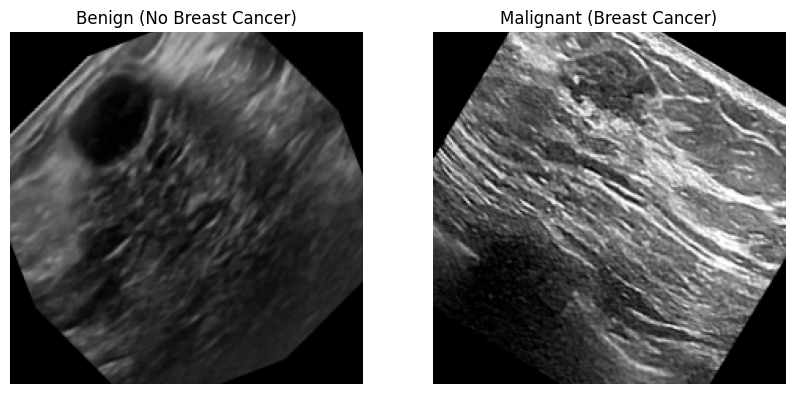

In [10]:
# Find one example of each class
benign_example = None
malignant_example = None

for imagepath in imagepaths:
    label = imagepath.split(os.path.sep)[-2]
    if label == "benign" and benign_example is None:
        benign_example = imagepath
    elif label == "malignant" and malignant_example is None:
        malignant_example = imagepath
    
    # Break the loop when both examples are found
    if benign_example and malignant_example:
        break

# Load and plot the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display benign image
benign_image = load_img(benign_example, target_size=(224, 224))
axes[0].imshow(benign_image)
axes[0].set_title("Benign (No Breast Cancer)")
axes[0].axis('off')

# Display malignant image
malignant_image = load_img(malignant_example, target_size=(224, 224))
axes[1].imshow(malignant_image)
axes[1].set_title("Malignant (Breast Cancer)")
axes[1].axis('off')

plt.show();

In [11]:
# Count the number of images for each class
labels = [imagepath.split(os.path.sep)[-2] for imagepath in imagepaths]
label_counts = Counter(labels)

# Create a DataFrame to display the results
data = {
    "Class": ["Benign (No Breast Cancer)", "Malignant (Breast Cancer)"],
    "Number of Images": [label_counts.get("benign", 0), label_counts.get("malignant", 0)]
}

df = pd.DataFrame(data)
display(df)

,Class,Number of Images
0,Benign (No Breast Cancer),4074
1,Malignant (Breast Cancer),4042


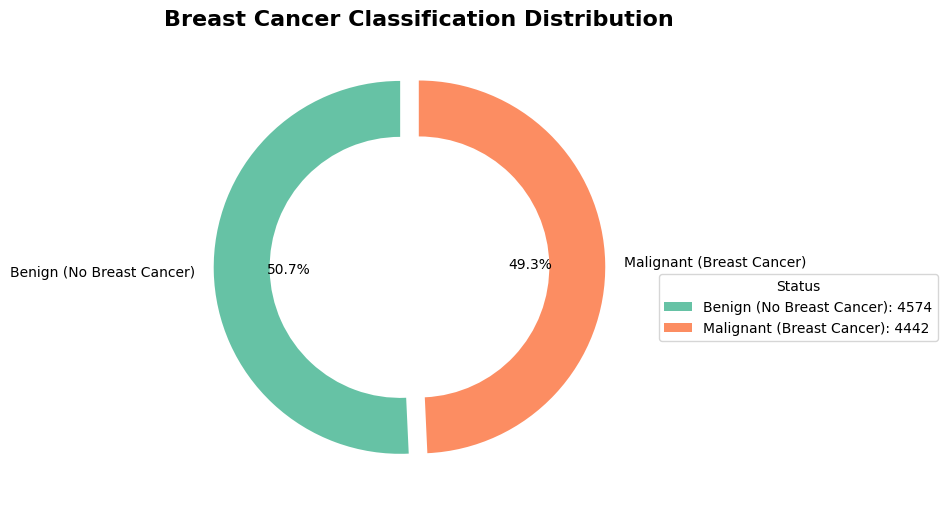

In [12]:
# Sample data
data = {
    'Class': ['Benign (No Breast Cancer)'] * 4574 + ['Malignant (Breast Cancer)'] * 4442
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
explode = [0.1, 0]  # Explode the first slice
plt.pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index, autopct='%1.1f%%', startangle=90,
        colors=['#66c2a5', '#fc8d62'], wedgeprops=dict(width=0.3), explode=explode)
plt.title('Breast Cancer Classification Distribution', fontsize=16, fontweight='bold')

# Legend with value counts
plt.legend(df['Class'].value_counts().index,
           title='Status', loc='best', bbox_to_anchor=(1, 0.5),
           labels=[f"{x}: {y}" for x, y in df['Class'].value_counts().items()])
plt.tight_layout()
plt.show();

In [13]:
train_data_dir = '/kaggle/input/ultrasound breast classification/train'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [14]:
train_df

,filepaths,labels
0,/kaggle/input/ultrasound breast classification...,benign
1,/kaggle/input/ultrasound breast classification...,benign
2,/kaggle/input/ultrasound breast classification...,benign
3,/kaggle/input/ultrasound breast classification...,benign
4,/kaggle/input/ultrasound breast classification...,benign
...,...,...
8111,/kaggle/input/ultrasound breast classification...,malignant
8112,/kaggle/input/ultrasound breast classification...,malignant
8113,/kaggle/input/ultrasound breast classification...,malignant
8114,/kaggle/input/ultrasound breast classification...,malignant


In [15]:
test_data_dir = '/kaggle/input/ultrasound breast classification/val'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [16]:
ts_df

,filepaths,labels
0,/kaggle/input/ultrasound breast classification...,benign
1,/kaggle/input/ultrasound breast classification...,benign
2,/kaggle/input/ultrasound breast classification...,benign
3,/kaggle/input/ultrasound breast classification...,benign
4,/kaggle/input/ultrasound breast classification...,benign
...,...,...
895,/kaggle/input/ultrasound breast classification...,malignant
896,/kaggle/input/ultrasound breast classification...,malignant
897,/kaggle/input/ultrasound breast classification...,malignant
898,/kaggle/input/ultrasound breast classification...,malignant


In [53]:
# import system libs
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import seaborn as sns
sns.set_theme(style="white", palette="muted")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pickle
import pandas as pd
from IPython.display import FileLink
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [19]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'binary',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'binary',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'binary',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 8116 validated image filenames belonging to 2 classes.
Found 450 validated image filenames belonging to 2 classes.
Found 450 validated image filenames belonging to 2 classes.


In [20]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = 4
model =Sequential ([
    Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=img_shape),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 47, 47, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 19, 19, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 17, 17, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 14,879,041 (56.76 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile (Adamax(learning_rate=0.001),loss='binary_crossentropy', metrics=["accuracy"])

In [23]:
model.save('model.h5')

In [24]:
epochs = 5  

history = model.fit(train_gen , epochs= epochs , verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/5


I0000 00:00:1722969542.979545     134 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722969543.010390     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.6152 - loss: 2.8083

W0000 00:00:1722969650.660156     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 172s 230ms/step - accuracy: 0.6154 - loss: 2.8045 - val_accuracy: 0.9022 - val_loss: 0.3267
Epoch 2/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 86s 168ms/step - accuracy: 0.8170 - loss: 0.3805 - val_accuracy: 0.8267 - val_loss: 0.3322
Epoch 3/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 85s 168ms/step - accuracy: 0.8893 - loss: 0.2472 - val_accuracy: 0.9556 - val_loss: 0.1010
Epoch 4/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 85s 167ms/step - accuracy: 0.9521 - loss: 0.1209 - val_accuracy: 0.9444 - val_loss: 0.2022
Epoch 5/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 85s 167ms/step - accuracy: 0.9743 - loss: 0.0704 - val_accuracy: 0.9044 - val_loss: 0.8757


In [25]:
# Save the history to a pickle file

import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)
    
# Load the history from the saved file
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

print(loaded_history)

{'accuracy': [0.7020699977874756, 0.8347707986831665, 0.9069738984107971, 0.9558895826339722, 0.9753572940826416], 'loss': [0.9190080165863037, 0.34147217869758606, 0.21526607871055603, 0.10990661382675171, 0.07030834257602692], 'val_accuracy': [0.902222216129303, 0.8266666531562805, 0.9555555582046509, 0.9444444179534912, 0.9044444561004639], 'val_loss': [0.3266640305519104, 0.33223140239715576, 0.10098160803318024, 0.2021602839231491, 0.8756518363952637]}


In [26]:
# Save the history to a csv file

# Convert the history to a pandas DataFrame
history_df = pd.DataFrame(history.history)
display(history_df)

# Save the history to a CSV file
history_df.to_csv('training_history.csv', index=False)

,accuracy,loss,val_accuracy,val_loss
0,0.702070,0.919008,0.902222,0.326664
1,0.834771,0.341472,0.826667,0.332231
2,0.906974,0.215266,0.955556,0.100982
3,0.955890,0.109907,0.944444,0.202160
4,0.975357,0.070308,0.904444,0.875652


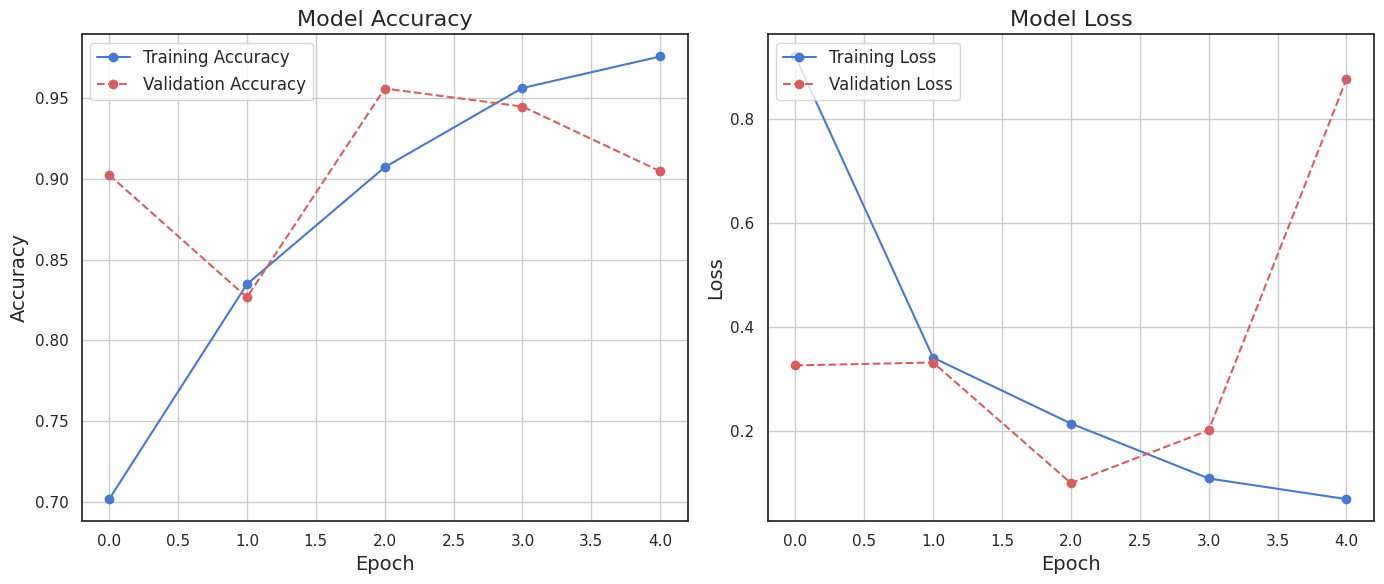

In [28]:
plt.figure(figsize=(14, 6))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='b')
plt.plot(history.history['val_accuracy'], marker='o', linestyle='--', color='r')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left', fontsize=12)
plt.grid(True)

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', linestyle='-', color='b')
plt.plot(history.history['val_loss'], marker='o', linestyle='--', color='r')
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show();

In [29]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9702 - loss: 0.1435
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8957 - loss: 1.0252
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9084 - loss: 0.6463
Train Loss:  0.17154546082019806
Train Accuracy:  0.96484375
--------------------
Validation Loss:  1.1024445295333862
Validation Accuracy:  0.890625
--------------------
Test Loss:  0.6238458752632141
Test Accuracy:  0.9140625


In [30]:
preds = model.predict(test_gen)  # preds will have shape (num_samples,)
y_pred = (preds > 0.5).astype(int)  

 4/29 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step

W0000 00:00:1722970403.288588     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step


In [32]:
y_true = test_gen.labels 
print(y_true)

[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate additional metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.9155555555555556
Precision:  0.8403361344537815
Recall:  1.0
F1 Score:  0.91324200913242


In [43]:
report = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       250
           1       0.84      1.00      0.91       200

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.93      0.92      0.92       450



In [40]:
cm = confusion_matrix(y_true, y_pred)

In [41]:
cm

array([[212,  38],
       [  0, 200]])

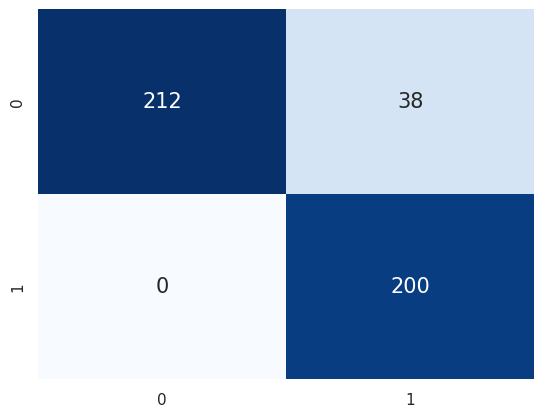

In [42]:
sns.heatmap(cm, fmt='d', annot=True, cmap='Blues', annot_kws={'size':15}, cbar=False)
plt.show()

# VGG16

In [44]:
from tensorflow.keras.applications import VGG16

In [45]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [46]:
for layer in base_model.layers:
    layer.trainable = False

In [47]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten

In [48]:
model_vgg16 = Sequential()
model_vgg16.add(base_model)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(256, activation='relu'))
model_vgg16.add(Dense(128, activation='relu'))
model_vgg16.add(Dense(1, activation='sigmoid'))

In [50]:
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# save model
model_vgg16.save('model_vgg16.h5')

In [52]:
epochs = 5  
history_vgg16 = model_vgg16.fit(train_gen , epochs= epochs , verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/5
  3/508 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.5451 - loss: 4.9402 

W0000 00:00:1722970866.935100     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8368 - loss: 1.3712

W0000 00:00:1722970907.956136     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722970909.119456     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 70s 96ms/step - accuracy: 0.8370 - loss: 1.3696 - val_accuracy: 0.9133 - val_loss: 0.3234
Epoch 2/5
  1/508 ━━━━━━━━━━━━━━━━━━━━ 1:17 153ms/step - accuracy: 0.9375 - loss: 0.2801

W0000 00:00:1722970915.562795     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.9625 - loss: 0.1368 - val_accuracy: 0.9022 - val_loss: 0.5812
Epoch 3/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.9664 - loss: 0.1604 - val_accuracy: 0.9089 - val_loss: 0.6207
Epoch 4/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 35s 69ms/step - accuracy: 0.9865 - loss: 0.0479 - val_accuracy: 0.8911 - val_loss: 0.4838
Epoch 5/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.9941 - loss: 0.0209 - val_accuracy: 0.8711 - val_loss: 0.8331


In [54]:
def save_history(history, model_name):
    # Save history to a pickle file
    with open(f'training_history_{model_name}.pkl', 'wb') as file:
        pickle.dump(history.history, file)

    # Save history to a CSV file
    history_df = pd.DataFrame(history.history)
    history_df.to_csv(f'training_history_{model_name}.csv', index=False)
    
    # Provide download links for the files
    display(FileLink(f'training_history_{model_name}.pkl'))
    display(FileLink(f'training_history_{model_name}.csv'))

def load_history(model_name):
    # Load history from a pickle file
    with open(f'training_history_{model_name}.pkl', 'rb') as file:
        loaded_history = pickle.load(file)
    return loaded_history

In [55]:
save_history(history_vgg16, 'vgg16')

# Load the history
loaded_history_vgg16 = load_history('vgg16')
print(loaded_history_vgg16)

/kaggle/working/training_history_vgg16.pkl

/kaggle/working/training_history_vgg16.csv

{'accuracy': [0.9024149775505066, 0.9661163091659546, 0.9728930592536926, 0.9874322414398193, 0.9906357526779175], 'loss': [0.5536258816719055, 0.12753728032112122, 0.10960058122873306, 0.045650944113731384, 0.030558058992028236], 'val_accuracy': [0.9133333563804626, 0.902222216129303, 0.9088888764381409, 0.8911111354827881, 0.8711110949516296], 'val_loss': [0.32340186834335327, 0.5811618566513062, 0.6206856369972229, 0.48375558853149414, 0.8331261277198792]}


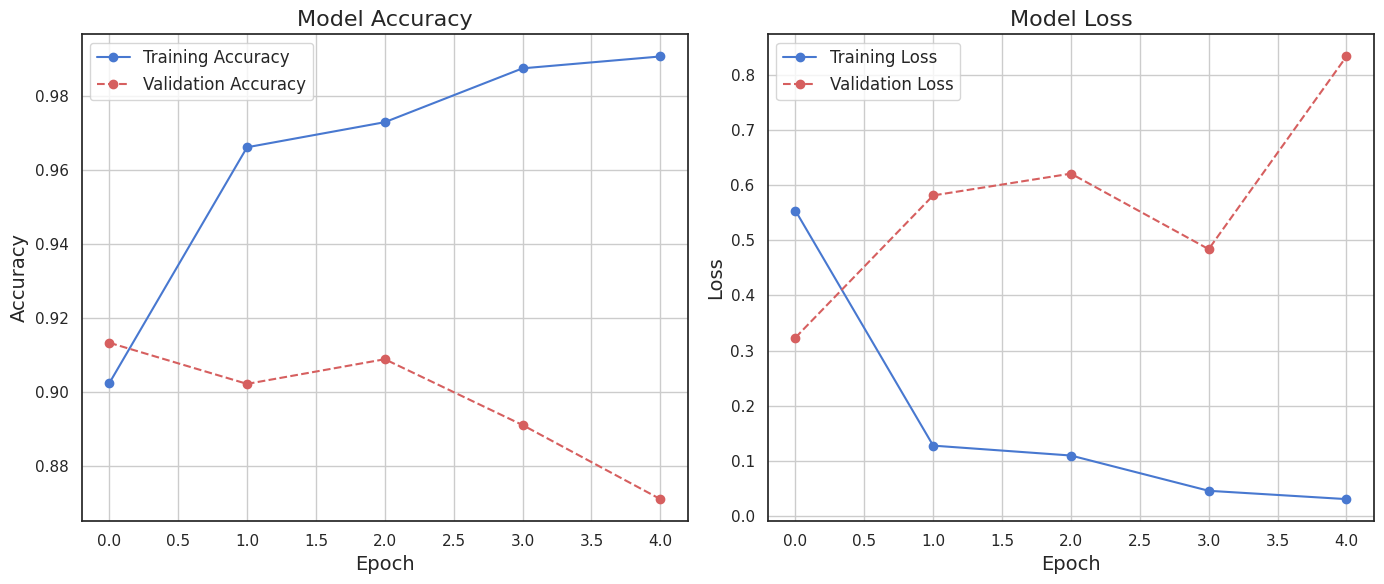

In [56]:
plt.figure(figsize=(14, 6))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'], marker='o', linestyle='-', color='b')
plt.plot(history_vgg16.history['val_accuracy'], marker='o', linestyle='--', color='r')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left', fontsize=12)
plt.grid(True)

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'], marker='o', linestyle='-', color='b')
plt.plot(history_vgg16.history['val_loss'], marker='o', linestyle='--', color='r')
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show();

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 1.0000 - loss: 0.0107
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8503 - loss: 0.7904
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9036 - loss: 0.5996

Train Loss: 0.0070564476773142815
Train Accuracy: 1.0
----------------------------------------------------------------------------------------------------

Validation Loss: 0.9173645973205566
Validation Accuracy: 0.86328125
----------------------------------------------------------------------------------------------------

Test Loss: 0.6626833081245422
Test Accuracy: 0.890625
----------------------------------------------------------------------------------------------------

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
Accuracy Score of VGG16: 0.8688888888888889
Precision Score of VGG16: 0.9607843137254902
Recall Score of VGG16: 0.735
F1 Score of VGG16: 0.8328611898016998

Classification Report:
              precision    recall  f1-score   support

           0       0

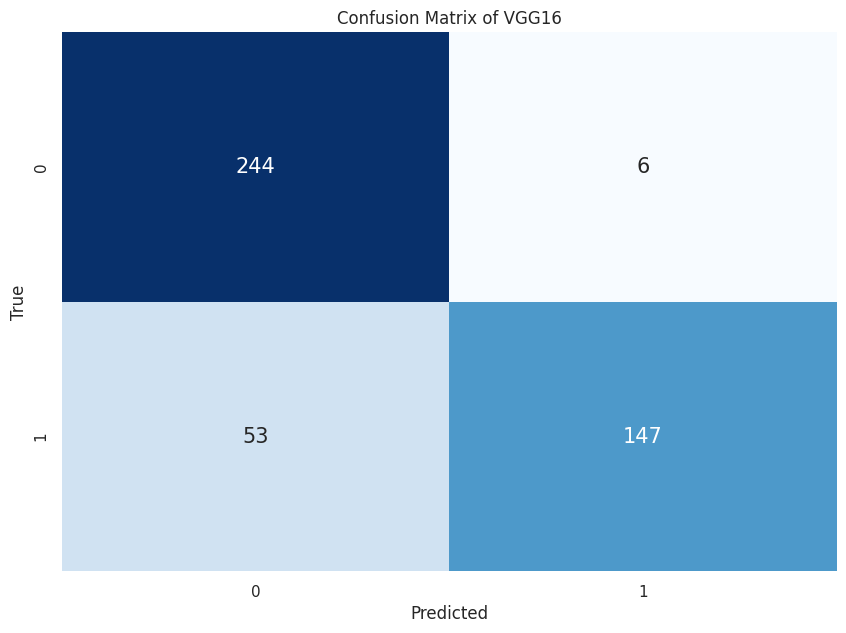

In [74]:
# Model Evaluation

def evaluate_model(model, train_gen, valid_gen, test_gen, model_name):
    # Evaluate the model on the training, validation, and test data
    train_score = model.evaluate(train_gen, steps=16, verbose=1)
    valid_score = model.evaluate(valid_gen, steps=16, verbose=1)
    test_score = model.evaluate(test_gen, steps=16, verbose=1)
    
    print()
    print(f"Train Loss: {train_score[0]}")
    print(f"Train Accuracy: {train_score[1]}")
    print('-' * 100);print()
    print(f"Validation Loss: {valid_score[0]}")
    print(f"Validation Accuracy: {valid_score[1]}")
    print('-' * 100);print()
    print(f"Test Loss: {test_score[0]}")
    print(f"Test Accuracy: {test_score[1]}")
    print('-' * 100);print()

    # Predict on the test data
    preds = model.predict(test_gen)
    y_pred = (preds > 0.5).astype(int).flatten()

    # True labels from the test data
    y_true = test_gen.labels

    # Calculate additional metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy Score of {model_name}:", accuracy)
    print(f"Precision Score of {model_name}:", precision)
    print(f"Recall Score of {model_name}:", recall)
    print(f"F1 Score of {model_name}:", f1)
    
    # Print classification report
    report = classification_report(y_true, y_pred)
    print("\nClassification Report:")
    print(report)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size':15})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix of {model_name}')
    plt.show();
    

# VGG16
evaluate_model(model_vgg16, train_gen, valid_gen, test_gen, 'VGG16')

# VG19

In [76]:
from tensorflow.keras.applications import VGG19

In [77]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [78]:
for layer in base_model.layers:
    layer.trainable = False

In [79]:
model_vgg19 = Sequential()
model_vgg19.add(base_model)
model_vgg19.add(Flatten())
model_vgg19.add(Dense(256, activation='relu'))
model_vgg19.add(Dense(128, activation='relu'))
model_vgg19.add(Dense(1, activation='sigmoid'))

In [80]:
model_vgg19.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
# save model
model_vgg19.save('model_vgg19.h5')
FileLink('model_vgg19.h5')

/kaggle/working/model_vgg19.h5

In [85]:
epochs = 5  
history_vgg19 = model_vgg19.fit(train_gen , epochs= epochs , verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/5
  1/508 ━━━━━━━━━━━━━━━━━━━━ 29:32 3s/step - accuracy: 0.2500 - loss: 3.8538

W0000 00:00:1722972655.546578     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7981 - loss: 1.8620

W0000 00:00:1722972709.300455     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722972710.781766     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 63s 117ms/step - accuracy: 0.7982 - loss: 1.8598 - val_accuracy: 0.9156 - val_loss: 0.3182
Epoch 2/5


W0000 00:00:1722972714.888582     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 57s 111ms/step - accuracy: 0.9716 - loss: 0.0883 - val_accuracy: 0.8889 - val_loss: 0.6110
Epoch 3/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.9782 - loss: 0.0598 - val_accuracy: 0.9333 - val_loss: 0.4676
Epoch 4/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 43s 84ms/step - accuracy: 0.9869 - loss: 0.0476 - val_accuracy: 0.9133 - val_loss: 0.4036
Epoch 5/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 43s 84ms/step - accuracy: 0.9791 - loss: 0.0670 - val_accuracy: 0.8978 - val_loss: 0.5057


In [86]:
save_history(history_vgg19, 'vgg19')

# Load the history
loaded_history_vgg19 = load_history('vgg19')
print(loaded_history_vgg19)

/kaggle/working/training_history_vgg19.pkl

/kaggle/working/training_history_vgg19.csv

{'accuracy': [0.8844258189201355, 0.9706752300262451, 0.9797930121421814, 0.9823805093765259, 0.9794233441352844], 'loss': [0.748616635799408, 0.09841226041316986, 0.05979064106941223, 0.060353703796863556, 0.06839331239461899], 'val_accuracy': [0.9155555367469788, 0.8888888955116272, 0.9333333373069763, 0.9133333563804626, 0.897777795791626], 'val_loss': [0.3181762099266052, 0.6110277771949768, 0.46758314967155457, 0.4036228656768799, 0.5056691765785217]}


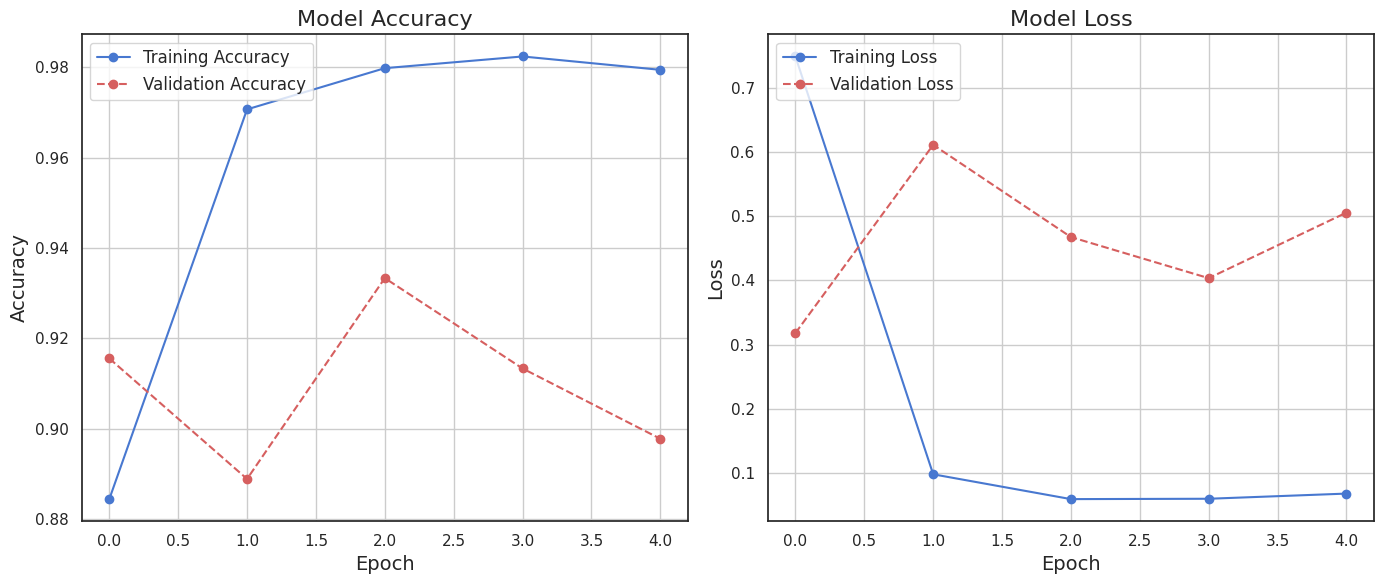

In [87]:
plt.figure(figsize=(14, 6))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vgg19.history['accuracy'], marker='o', linestyle='-', color='b')
plt.plot(history_vgg19.history['val_accuracy'], marker='o', linestyle='--', color='r')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left', fontsize=12)
plt.grid(True)

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg19.history['loss'], marker='o', linestyle='-', color='b')
plt.plot(history_vgg19.history['val_loss'], marker='o', linestyle='--', color='r')
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show();

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9873 - loss: 0.0224
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9048 - loss: 0.3913
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9164 - loss: 0.3000

Train Loss: 0.012236356735229492
Train Accuracy: 0.99609375
----------------------------------------------------------------------------------------------------

Validation Loss: 0.49067050218582153
Validation Accuracy: 0.890625
----------------------------------------------------------------------------------------------------

Test Loss: 0.3326580822467804
Test Accuracy: 0.92578125
----------------------------------------------------------------------------------------------------

 3/29 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step 

W0000 00:00:1722972951.380209     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step


W0000 00:00:1722972954.148065     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Accuracy Score of VGG19: 0.9044444444444445
Precision Score of VGG19: 0.9153439153439153
Recall Score of VGG19: 0.865
F1 Score of VGG19: 0.8894601542416453

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       250
           1       0.92      0.86      0.89       200

    accuracy                           0.90       450
   macro avg       0.91      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



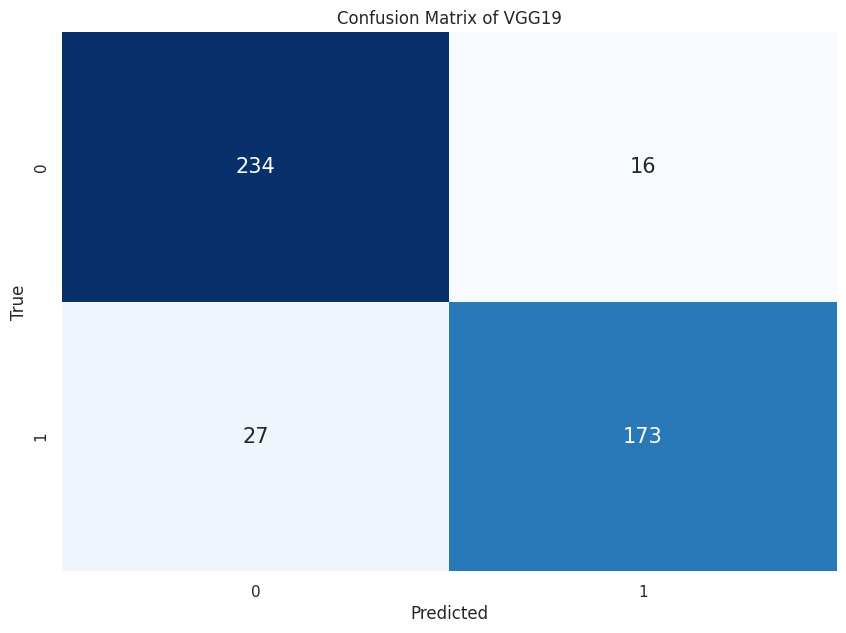

In [88]:
# Model Evaluation

def evaluate_model(model, train_gen, valid_gen, test_gen, model_name):
    # Evaluate the model on the training, validation, and test data
    train_score = model.evaluate(train_gen, steps=16, verbose=1)
    valid_score = model.evaluate(valid_gen, steps=16, verbose=1)
    test_score = model.evaluate(test_gen, steps=16, verbose=1)
    
    print()
    print(f"Train Loss: {train_score[0]}")
    print(f"Train Accuracy: {train_score[1]}")
    print('-' * 100);print()
    print(f"Validation Loss: {valid_score[0]}")
    print(f"Validation Accuracy: {valid_score[1]}")
    print('-' * 100);print()
    print(f"Test Loss: {test_score[0]}")
    print(f"Test Accuracy: {test_score[1]}")
    print('-' * 100);print()

    # Predict on the test data
    preds = model.predict(test_gen)
    y_pred = (preds > 0.5).astype(int).flatten()

    # True labels from the test data
    y_true = test_gen.labels

    # Calculate additional metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy Score of {model_name}:", accuracy)
    print(f"Precision Score of {model_name}:", precision)
    print(f"Recall Score of {model_name}:", recall)
    print(f"F1 Score of {model_name}:", f1)
    
    # Print classification report
    report = classification_report(y_true, y_pred)
    print("\nClassification Report:")
    print(report)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size':15})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix of {model_name}')
    plt.show();
    

# VGG19
evaluate_model(model_vgg19, train_gen, valid_gen, test_gen, 'VGG19')

# EfficientNetB0

In [3]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [92]:
model_eff = Sequential()
model_eff.add(base_model)
model_eff.add(GlobalAveragePooling2D())
model_eff.add(Dense(256, activation='relu'))
model_eff.add(Dense(128, activation='relu'))
model_eff.add(Dense(1, activation='sigmoid'))

In [93]:
model_eff.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
# save model
model_eff.save('model_eff.h5')

In [94]:
epochs = 5  
history_eff = model_eff.fit(train_gen , epochs= epochs , verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/5
  4/508 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.6276 - loss: 0.6427 

W0000 00:00:1722973035.154212     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8175 - loss: 0.3941

W0000 00:00:1722973089.819961     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722973096.545040     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 106s 137ms/step - accuracy: 0.8175 - loss: 0.3940 - val_accuracy: 0.8867 - val_loss: 0.2463
Epoch 2/5
  2/508 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 1.0000 - loss: 0.1410 

W0000 00:00:1722973104.655487     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


508/508 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.9121 - loss: 0.2090 - val_accuracy: 0.9178 - val_loss: 0.1941
Epoch 3/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 38s 74ms/step - accuracy: 0.9346 - loss: 0.1531 - val_accuracy: 0.9311 - val_loss: 0.1480
Epoch 4/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.9541 - loss: 0.1101 - val_accuracy: 0.9622 - val_loss: 0.1089
Epoch 5/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 33s 65ms/step - accuracy: 0.9647 - loss: 0.0881 - val_accuracy: 0.9644 - val_loss: 0.0933


In [96]:
def save_history(history, model_name):
    # Save history to a pickle file
    with open(f'training_history_{model_name}.pkl', 'wb') as file:
        pickle.dump(history.history, file)

    # Save history to a CSV file
    history_df = pd.DataFrame(history.history)
    history_df.to_csv(f'training_history_{model_name}.csv', index=False)
    
    # Provide download links for the files
    display(FileLink(f'training_history_{model_name}.pkl'))
    display(FileLink(f'training_history_{model_name}.csv'))

def load_history(model_name):
    # Load history from a pickle file
    with open(f'training_history_{model_name}.pkl', 'rb') as file:
        loaded_history = pickle.load(file)
    return loaded_history

In [97]:
save_history(history_eff, 'EfficientNetB0')

# Load the history
loaded_history_eff = load_history('EfficientNetB0')
print(loaded_history_eff)

/kaggle/working/training_history_EfficientNetB0.pkl

/kaggle/working/training_history_EfficientNetB0.csv

{'accuracy': [0.8538689017295837, 0.9188023805618286, 0.9409807920455933, 0.952686071395874, 0.9646377563476562], 'loss': [0.326058954000473, 0.19530969858169556, 0.14125913381576538, 0.11280392855405807, 0.08809208124876022], 'val_accuracy': [0.8866666555404663, 0.9177777767181396, 0.9311110973358154, 0.9622222185134888, 0.9644444584846497], 'val_loss': [0.2463066726922989, 0.19414569437503815, 0.1479567289352417, 0.10891521722078323, 0.09330911934375763]}


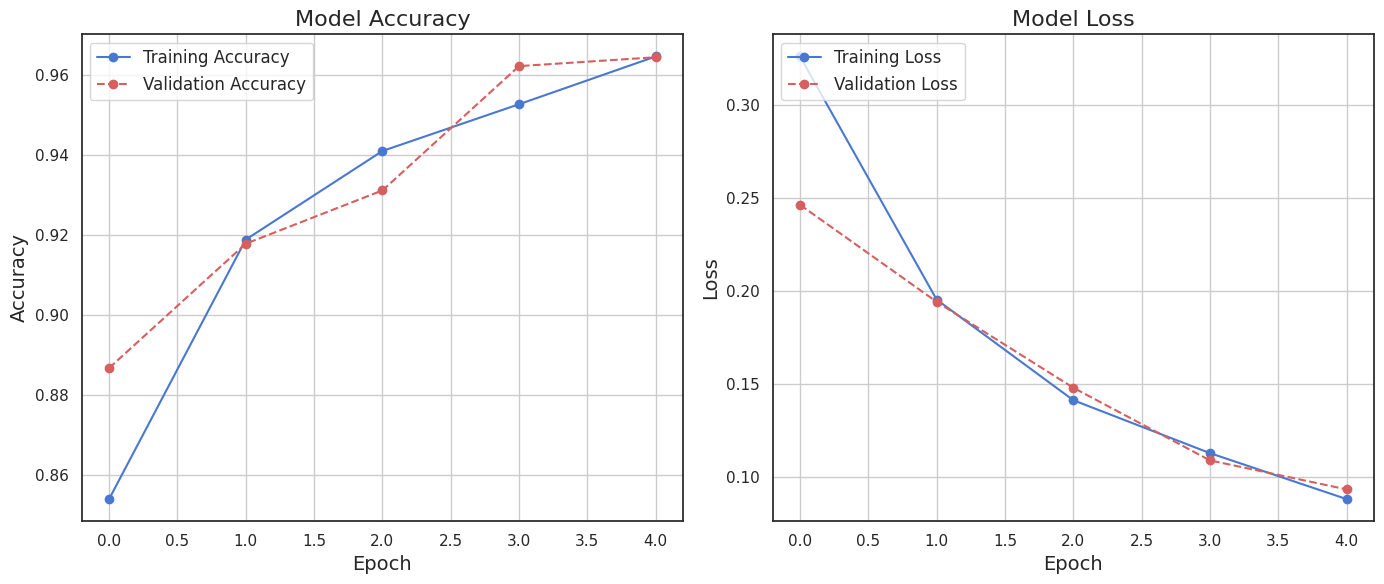

In [104]:
plt.figure(figsize=(14, 6))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history_eff.history['accuracy'], marker='o', linestyle='-', color='b')
plt.plot(history_eff.history['val_accuracy'], marker='o', linestyle='--', color='r')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left', fontsize=12)
plt.grid(True)

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history_eff.history['loss'], marker='o', linestyle='-', color='b')
plt.plot(history_eff.history['val_loss'], marker='o', linestyle='--', color='r')
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show();

In [ ]:
# Model Evaluation

def evaluate_model(model, train_gen, valid_gen, test_gen, model_name):
    # Evaluate the model on the training, validation, and test data
    train_score = model.evaluate(train_gen, steps=16, verbose=1)
    valid_score = model.evaluate(valid_gen, steps=16, verbose=1)
    test_score = model.evaluate(test_gen, steps=16, verbose=1)
    
    print()
    print(f"Train Loss: {train_score[0]}")
    print(f"Train Accuracy: {train_score[1]}")
    print('-' * 100);print()
    print(f"Validation Loss: {valid_score[0]}")
    print(f"Validation Accuracy: {valid_score[1]}")
    print('-' * 100);print()
    print(f"Test Loss: {test_score[0]}")
    print(f"Test Accuracy: {test_score[1]}")
    print('-' * 100);print()

    # Predict on the test data
    preds = model.predict(test_gen)
    y_pred = (preds > 0.5).astype(int).flatten()

    # True labels from the test data
    y_true = test_gen.labels

    # Calculate additional metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy Score of {model_name}:", accuracy)
    print(f"Precision Score of {model_name}:", precision)
    print(f"Recall Score of {model_name}:", recall)
    print(f"F1 Score of {model_name}:", f1)
    
    # Print classification report
    report = classification_report(y_true, y_pred)
    print("\nClassification Report:")
    print(report)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size':15})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix of {model_name}')
    plt.show();
    

# EfficientNetB0
evaluate_model(model_eff, train_gen, valid_gen, test_gen, 'EfficientNetB0')

In [127]:
import os
import tensorflow as tf


directory = '/kaggle/working/models'
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory '{directory}' created.")

model_path = os.path.join(directory, 'model_eff.keras')

model_eff.save(model_path)
print("Model saved successfully at:", model_path)

tf.keras.backend.clear_session()

Model saved successfully at: /kaggle/working/models/model_eff.keras


# Implementing the OOD Detection

In [7]:
model_eff = load_model('model_eff.h5')

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [14]:
# Function to preprocess input image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_with_ood_detection(model, image_path, threshold=0.8):
    img_array = preprocess_image(image_path, target_size=(224, 224))
    predictions = model.predict(img_array)
    max_prob = np.max(predictions)

    if max_prob < threshold:
        return "Unknown Image Detected"
    else:
        class_names = ['benign', 'malignant']
        return class_names[int(predictions > 0.5)]

In [15]:
# Testing the OOD Detection

image_path = 'skull.png'
result = predict_with_ood_detection(model_eff, image_path, threshold=0.8)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Prediction: Unknown Image Detected
